# Importing Libraries

In [140]:

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import joblib
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, StackingRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from scipy.sparse import hstack
from scipy import sparse
import pandas as pd
import numpy as np
import seaborn as sns

from copy import deepcopy

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# loading Data

In [125]:
traindf = pd.read_csv('Student_Data.csv')
traindf.head(10)

,Student ID,First Name,Last Name,Age,Birth Province,Current Residence,Parent Literacy Status,Financial Background,Primary School Percentage,Secondary School Percentage,...,Favorite Subject,Mathematical Knowledge Level,Type of School,Intermediate Stream,Accommodation Mode,Daily Study Hours,Math Percentage,Physics Percentage,Chemistry Percentage,Preferred Career Path
0,1,Winni,Blethyn,15,Nimroz,Nangarhar,Literate,High,54.25,65.51,...,Pashto,Medium,Government,Science,Day Scholar,2,97.70,47.51,84.70,Faculty of Economics
1,2,Trescha,Stopper,15,Laghman,Parwan,Literate,Middle,55.59,61.25,...,Dari,High,Private,Technical,Hostel,4,92.58,86.80,67.54,Faculty of Pharmacy
2,3,Elianore,Walkingshaw,16,Laghman,Nuristan,Literate,Middle,82.66,49.70,...,Computer Science,Low,Private,Science,Hostel,1,66.10,99.31,74.35,Faculty of Social Sciences
3,4,Emili,Burns,16,Nimroz,Helmand,Literate,Middle,48.17,98.50,...,Art,Medium,Private,Commerce,Day Scholar,7,63.17,73.70,45.92,Faculty of Pharmacy
4,5,Evvy,Looney,18,Nuristan,Ghazni,Literate,Middle,60.36,99.69,...,Chemistry,Medium,Private,Science,Hostel,1,57.65,47.55,63.63,Faculty of Agriculture
5,6,Wiatt,Brownlow,18,Kandahar,Daykundi,Illiterate,High,71.76,58.79,...,Pashto,High,Private,Science,Day Scholar,5,67.13,43.86,82.06,Faculty of Veterinary Science
6,7,Frederich,Payton,15,Faryab,Helmand,Literate,Low,71.90,65.89,...,Geography,High,Government,Commerce,Hostel,5,68.32,69.06,64.89,Faculty of Law and Political Science
7,8,Jillie,Tumelty,17,Panjshir,Baghlan,Illiterate,Low,91.67,55.72,...,History,Low,Private,Science,Day Scholar,1,42.61,91.65,94.20,Faculty of Islamic Studies
8,9,Viva,Girling,16,Herat,Bamyan,Illiterate,Low,66.03,71.94,...,Civics,Low,Government,Technical,Day Scholar,3,67.32,94.13,84.34,Faculty of Fine Arts
9,10,Samaria,Ledley,15,Ghazni,Faryab,Illiterate,High,60.38,82.49,...,Physics,Medium,Private,Art,Hostel,3,44.29,83.34,51.79,Faculty of Literature and Humanities


In [126]:
traindf.describe()

,Student ID,Age,Primary School Percentage,Secondary School Percentage,Daily Study Hours,Math Percentage,Physics Percentage,Chemistry Percentage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.988000,63.960167,63.388067,3.965667,62.933143,63.203377,63.560977
std,866.169729,1.401372,24.040712,24.167522,2.037614,23.687703,23.745173,23.541423
min,1.000000,14.000000,0.030000,0.060000,1.000000,0.060000,0.110000,0.080000
25%,750.750000,15.000000,48.307500,47.542500,2.000000,48.232500,47.607500,48.397500
50%,1500.500000,16.000000,66.245000,65.960000,4.000000,64.750000,65.080000,65.585000
75%,2250.250000,17.000000,83.450000,82.960000,6.000000,82.080000,82.510000,83.040000
max,3000.000000,18.000000,99.950000,99.980000,7.000000,99.980000,99.960000,100.000000


In [127]:
traindf['Preferred Career Path'].value_counts()

Preferred Career Path
Faculty of Economics                    216
Faculty of Engineering                  212
Faculty of Veterinary Science           198
Faculty of Journalism                   195
Faculty of Fine Arts                    194
Faculty of Literature and Humanities    190
Faculty of Education                    189
Faculty of Public Health                187
Faculty of Computer Science             185
Faculty of Social Sciences              184
Faculty of Islamic Studies              181
Faculty of Pharmacy                     177
Faculty of Agriculture                  177
Faculty of Science                      176
Faculty of Medicine                     175
Faculty of Law and Political Science    164
Name: count, dtype: int64

In [128]:
traindf['Birth Province'].value_counts()

Birth Province
Helmand       101
Urozgan       100
Balkh         100
Kandahar       99
Kunar          98
Zabul          96
Baghlan        96
Khost          96
Wardak         96
Paktika        94
Herat          93
Kapisa         92
Kunduz         92
Ghor           91
Badakhshan     91
Parwan         90
Sar-e Pol      89
Nimroz         89
Nangarhar      88
Faryab         88
Farah          86
Nuristan       86
Panjshir       85
Kabul          84
Logar          84
Jowzjan        83
Laghman        82
Ghazni         82
Daykundi       80
Bamyan         77
Takhar         77
Samangan       76
Paktia         72
Badghis        67
Name: count, dtype: int64

In [129]:
traindf['Accommodation Mode'].value_counts()

Accommodation Mode
Hostel         1524
Day Scholar    1476
Name: count, dtype: int64

## Finding Patterns

In [130]:
pd.crosstab(traindf['Preferred Career Path'],traindf['Accommodation Mode'])

Accommodation Mode,Day Scholar,Hostel
Preferred Career Path,,
Faculty of Agriculture,81,96
Faculty of Computer Science,93,92
Faculty of Economics,100,116
Faculty of Education,95,94
Faculty of Engineering,116,96
Faculty of Fine Arts,86,108
Faculty of Islamic Studies,87,94
Faculty of Journalism,98,97
Faculty of Law and Political Science,80,84


Text(0, 0.5, 'Amount')

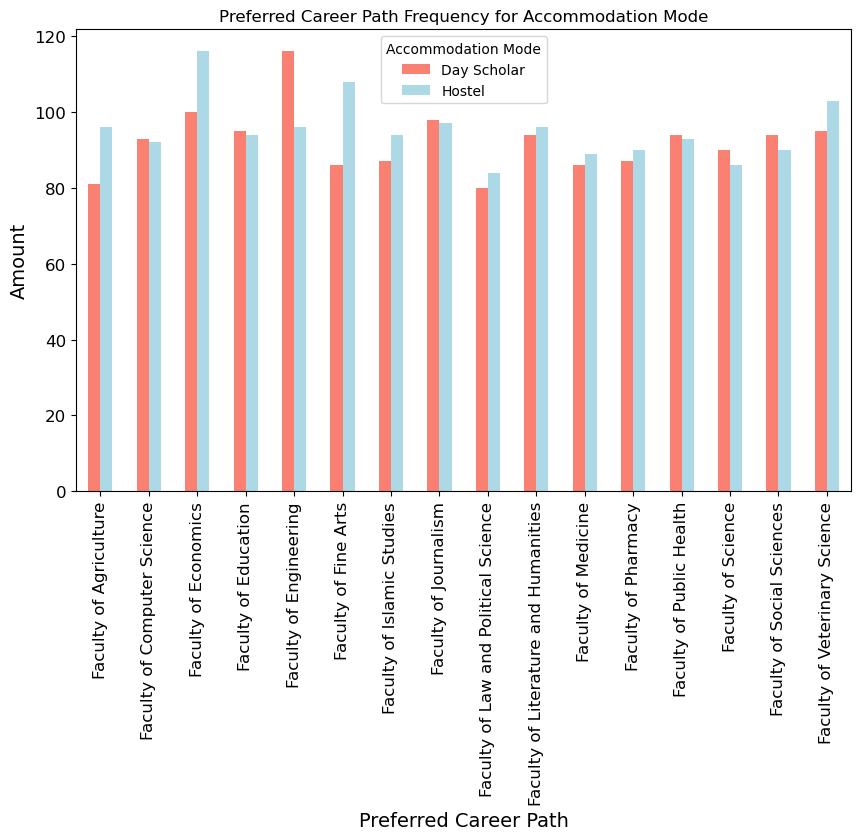

In [131]:
pd.crosstab(traindf['Preferred Career Path'],traindf['Accommodation Mode']).plot(kind='bar',
                                                                                 figsize=(10, 6),
                                                                                 color = ["salmon", "lightblue"])

plt.title("Preferred Career Path Frequency for Accommodation Mode")
plt.ylabel("Amount")

<Axes: ylabel='Frequency'>

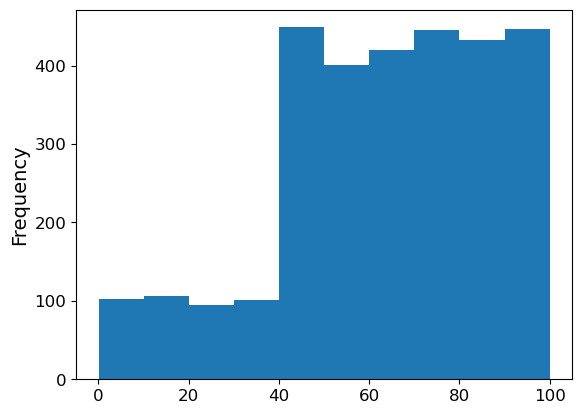

In [132]:
traindf['Secondary School Percentage'].plot.hist()

<Axes: ylabel='Frequency'>

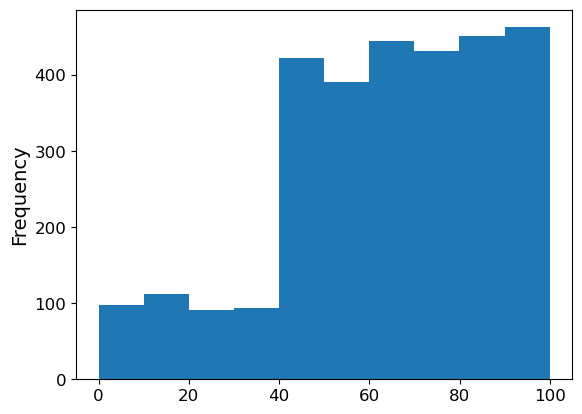

In [133]:
traindf['Primary School Percentage'].plot.hist()

In [134]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_features, categorical_features):
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        
        self.numeric_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])
        
        self.categorical_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        self.preprocessor = ColumnTransformer([
            ('numeric', self.numeric_pipeline, self.numeric_features),
            ('categorical', self.categorical_pipeline, self.categorical_features)
        ])
        
    def fit(self, X, y=None):
        self.preprocessor.fit(X)
        return self
    
    def transform(self, X):
        return self.preprocessor.transform(X)

# Deviding Data to Train and Test Sets

In [135]:
train_x = traindf.drop('Preferred Career Path',axis=1)
train_y = traindf[['Preferred Career Path']]

train_y.isnull().any()

Preferred Career Path    False
dtype: bool

In [136]:
x_train , x_test , y_train , y_test = train_test_split(train_x , train_y , test_size = 0.2 , random_state = 42)

# Data Cleaning and Preprocessing

In [145]:
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x_train.select_dtypes(include=['category', 'object']).columns

print ("the numerical cols :" , numerical_cols)
print("the categroical cols " , categorical_cols)

col_tsf = make_column_transformer((make_pipeline(SimpleImputer(strategy='median'),StandardScaler()),numerical_cols),
                                  ( make_pipeline(SimpleImputer(strategy='most_frequent'),                  
                                OneHotEncoder(handle_unknown='ignore')),categorical_cols),
                                 remainder='passthrough')

x_preprocessed_train = col_tsf.fit_transform(x_train)
x_preprocessed_test = col_tsf.transform(x_test)

joblib.dump(col_tsf, 'column_transformer.pkl')


the numerical cols : Index(['Student ID', 'Age', 'Primary School Percentage',
       'Secondary School Percentage', 'Daily Study Hours', 'Math Percentage',
       'Physics Percentage', 'Chemistry Percentage'],
      dtype='object')
the categroical cols  Index(['First Name', 'Last Name', 'Birth Province', 'Current Residence',
       'Parent Literacy Status', 'Financial Background', 'Medium of Education',
       'School Area', 'Family Literacy Rate', 'Favorite Subject',
       'Mathematical Knowledge Level', 'Type of School', 'Intermediate Stream',
       'Accommodation Mode'],
      dtype='object')


['column_transformer.pkl']

Index(['First Name_encoded', 'Last Name_encoded', 'Birth Province_encoded',
       'Current Residence_encoded', 'Parent Literacy Status_encoded',
       'Financial Background_encoded', 'Medium of Education_encoded',
       'School Area_encoded', 'Family Literacy Rate_encoded',
       'Favorite Subject_encoded', 'Mathematical Knowledge Level_encoded',
       'Type of School_encoded', 'Intermediate Stream_encoded',
       'Accommodation Mode_encoded'],
      dtype='object')

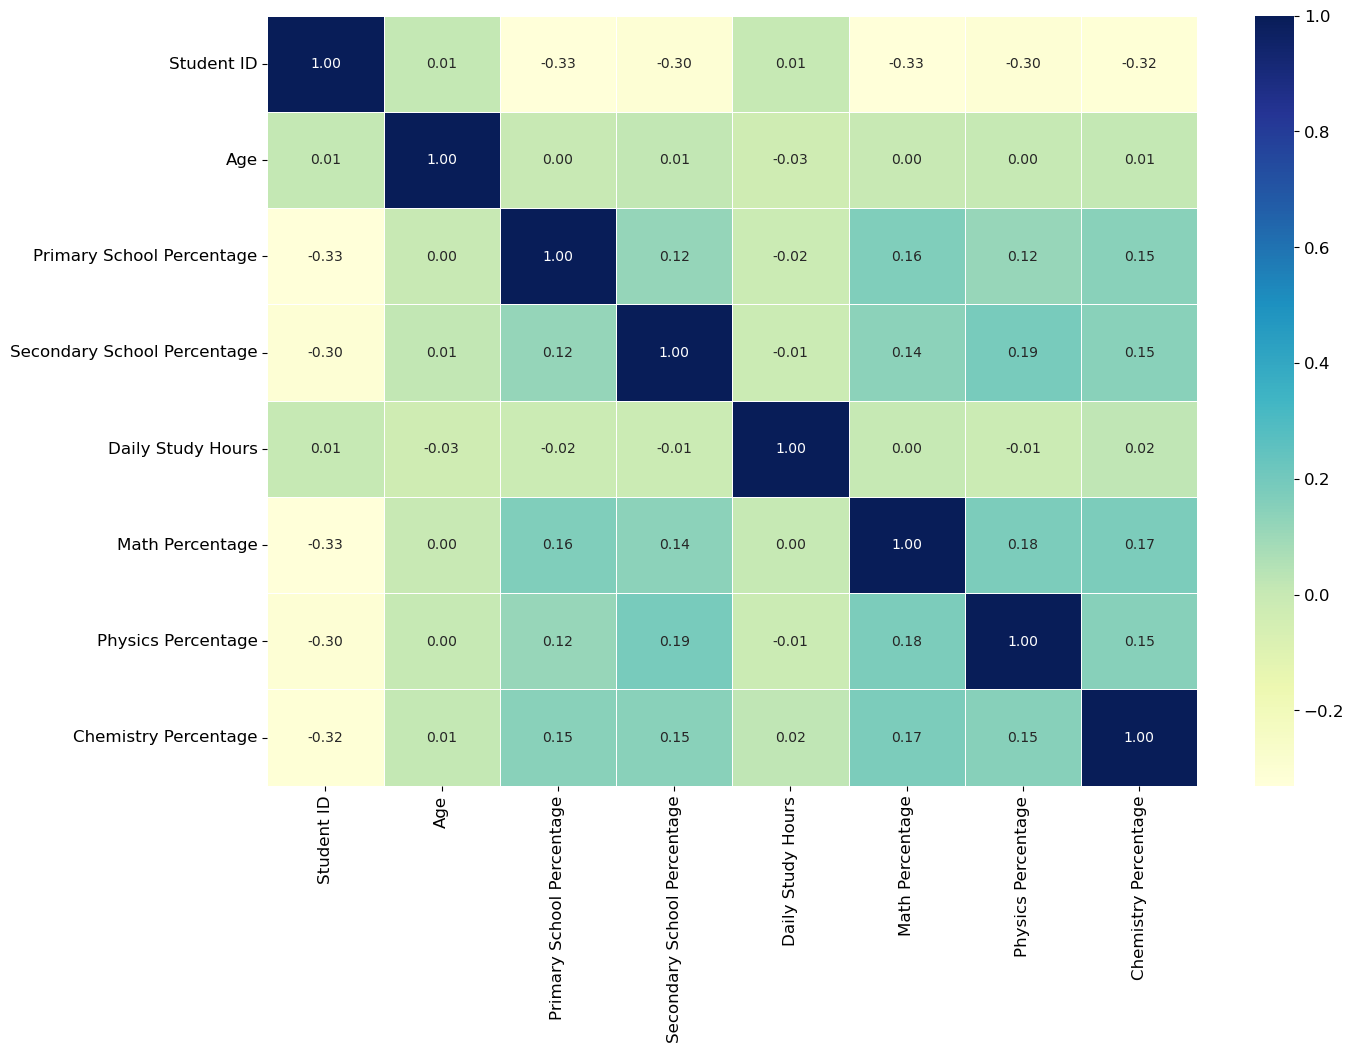

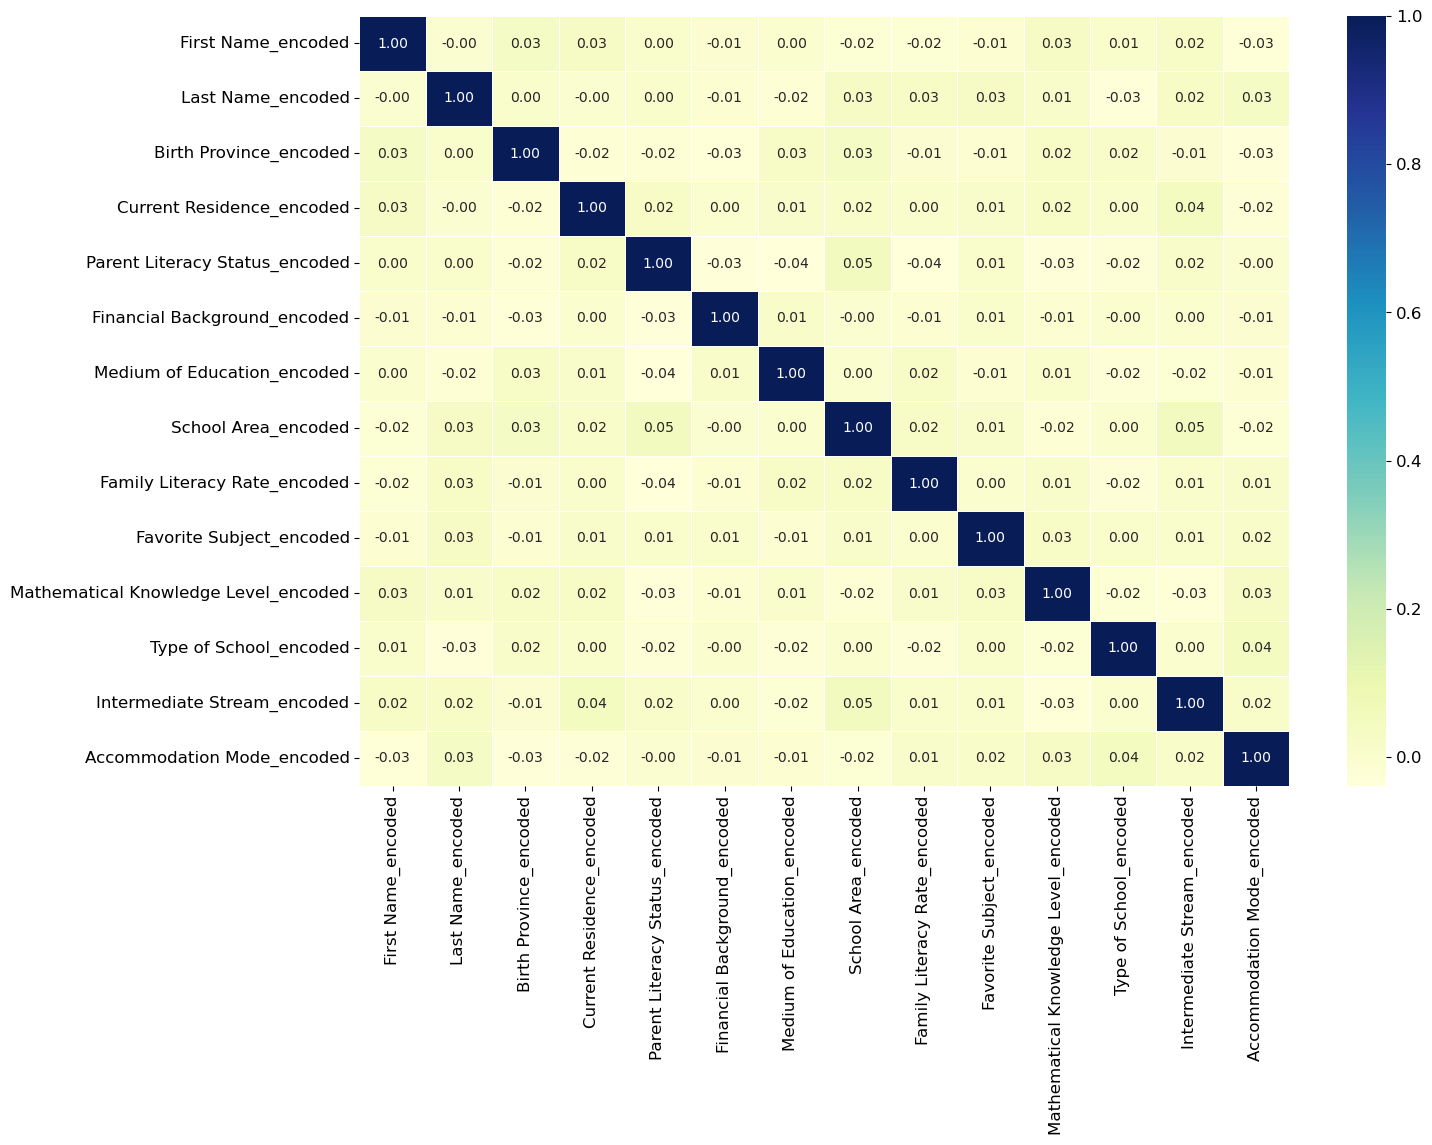

In [138]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = traindf

# عددي ډیټا لپاره د همبستګۍ میټرکس
correlation_matrix = df[numerical_cols].corr()
# print("Correlation Matrix:\n", correlation_matrix)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# کټګوري ډیټا لپاره لیبل اینکوډینګ
label_encoder = LabelEncoder()
encoded_columns = {}

for column in categorical_cols:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    encoded_columns[column + '_encoded'] = df[column + '_encoded']
cat_df = pd.DataFrame(encoded_columns)
corr = cat_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr,
                  annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

cat_df.columns
# عددي او کټګوري ډیټا سره یوځای کول
# combined_data = pd.concat([df[numerical_cols], pd.DataFrame(encoded_columns)], axis=1)
# print("\nCombined Data:\n", combined_data)

In [139]:
combined_data

,Student ID,Age,Primary School Percentage,Secondary School Percentage,Daily Study Hours,Math Percentage,Physics Percentage,Chemistry Percentage,First Name_encoded,Last Name_encoded,...,Parent Literacy Status_encoded,Financial Background_encoded,Medium of Education_encoded,School Area_encoded,Family Literacy Rate_encoded,Favorite Subject_encoded,Mathematical Knowledge Level_encoded,Type of School_encoded,Intermediate Stream_encoded,Accommodation Mode_encoded
0,1,15,54.25,65.51,2,97.70,47.51,84.70,2473,264,...,1,0,83,1,2,12,2,0,2,0
1,2,15,55.59,61.25,4,92.58,86.80,67.54,2355,2539,...,1,2,22,1,0,5,0,1,3,1
2,3,16,82.66,49.70,1,66.10,99.31,74.35,795,2772,...,1,2,8,0,0,4,1,1,2,1
3,4,16,48.17,98.50,7,63.17,73.70,45.92,829,399,...,1,2,39,0,0,0,2,1,1,0
4,5,18,60.36,99.69,1,57.65,47.55,63.63,884,1658,...,1,2,61,0,1,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,17,73.45,8.97,1,74.30,16.46,10.34,640,963,...,0,0,63,1,2,13,2,0,3,0
2996,2997,16,11.21,60.37,4,70.46,88.23,61.73,2059,2397,...,0,1,22,0,0,1,1,1,0,0
2997,2998,16,22.00,80.98,2,60.41,61.89,67.72,1447,1772,...,0,1,78,0,2,10,1,1,1,1
2998,2999,14,13.78,80.59,6,59.82,19.05,12.66,2361,908,...,1,2,2,1,2,13,1,0,1,0


# Model Training And Evaluation


In [142]:
RFC = RandomForestClassifier()
prams = {
    "max_features": uniform(0.1, 0.9),
    "n_estimators": randint(100, 1000),
    "max_depth": randint(10,50),
    "min_samples_split":randint(2,20)
 }

rnd_search = RandomizedSearchCV(RFC , prams , n_iter = 30 , cv = 3 , n_jobs=-1 , random_state=42 ) 
rndx = rnd_search.fit(x_preprocessed_train,y_train)
joblib.dump(rndx, 'trained_random_forest_model_for_SCP.pkl')
pred_train = rndx.predict(x_preprocessed_train)
mse = accuracy_score( pred_train, y_train )

print('the result of the train set :', mse)

predTREE_test = rndx.predict(x_preprocessed_test)
msei = accuracy_score(predTREE_test,y_test )

print('the result of the test set :', msei)
print(classification_report(y_test,predTREE_test))
print(confusion_matrix(y_test,predTREE_test))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


the result of the train set : 0.995
the result of the test set : 0.065
                                      precision    recall  f1-score   support

              Faculty of Agriculture       0.11      0.03      0.05        35
         Faculty of Computer Science       0.05      0.06      0.05        33
                Faculty of Economics       0.09      0.15      0.11        46
                Faculty of Education       0.20      0.06      0.10        47
              Faculty of Engineering       0.05      0.11      0.06        44
                Faculty of Fine Arts       0.06      0.05      0.05        40
          Faculty of Islamic Studies       0.04      0.03      0.03        33
               Faculty of Journalism       0.09      0.10      0.10        40
Faculty of Law and Political Science       0.09      0.03      0.05        30
Faculty of Literature and Humanities       0.05      0.05      0.05        40
                 Faculty of Medicine       0.11      0.06      0.07   

In [18]:
GBC = GradientBoostingClassifier()
rnd_search_1 = RandomizedSearchCV(GBC, prams, cv = 3, n_jobs=-1, random_state=42)

# Music-Genre-Prediction-with-Decision-Tree-ML-in-Python JupyterNotebook

**Design a Music Genre Recommendation System in Python Using a Decision Tree Classifier. This code contains training, testing, prediction, and model storage in Jupyter Notebook. Begin your machine learning career with this repo for Decision Tree music genre classification.**

**********************************************************************************************************************************************************************
# Machine learning

**Machine learning is a powerful method for handling complicated image classification issues, such as determining whether an image depicts a cat, dog, or horse. The primary benefit of employing machine learning is that it can learn from vast volumes of labelled data to uncover patterns and characteristics that differentiate between various classes. This reduces the need for manual rule-based programming and increases system flexibility and adaptability. The model's accuracy in identifying fresh photos may be constantly improved with the addition of new data, guaranteeing that it can keep up with changing real-world situations. As a result, machine learning may be used to create strong and accurate picture categorization systems.**

# Applications 

 - Self-driving cars
 - Robotics
 - Language Processing
 - Vision Processing
 - Forecasting Stock Market Trends
 - Customer Behavior Analysis 
 - Fraud Detection and more
 
# Machine Learning in Action
**Machine learning projects typically involve several key steps :**
 - **Import the Data**
 - **Clean the Data**
 - **Split the Data into Training/Test Sets**
 - **Create a Model**
 - **Train the Model**
 - **Make Predictions**
 - **Evaluate and Improve**
 
 **********************************************************************************************************************************************************************
 
# Getting Started with Machine Learning : Music Genre Prediction
These codes can be used as a reference to build a music genre classifier using the Decision Tree algorithm in scikit-learn library. The codes includes the implementation of the model training, testing and prediction, as well as the storage of the trained model in Jupyter Notebook. This repository can serve as a starting point for those interested in exploring Decision Trees for music genre classification and can be easily modified to fit specific needs and data.

# Requirement :
 - Python 3.x
 - pandas library for data manipulation.
 - scikit-learn library for machine learning algorithms.
 - graphviz library for visualizing decision trees.
 - Jupyter Notebook for executing code [Installing Jupyter Notebooks/Anaconda](https://youtu.be/WUeBzT43JyY)
 - scikit-learn's joblib library for storing trained models for future use.
 - A dataset for training the Decision Tree classifier [music.csv](http://bit.ly/music-csv)
 
 **********************************************************************************************************************************************************************
 
*If you have any ideas or suggestions for improving this project, feel free to fork the repository, make changes, and submit a pull request. With your contributions, we can make this project even better.*


 
 
